## Лабораторна робота 1 - Знайомство з векторними та матричними операціями на прикладі бібліотеки [NumPy](https://numpy.org/doc/stable/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Завдання 1

У машинному навчанні часто використовується логістична функція:
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

Візуалізувати цю функцію на проміжку $[-5, 5]$

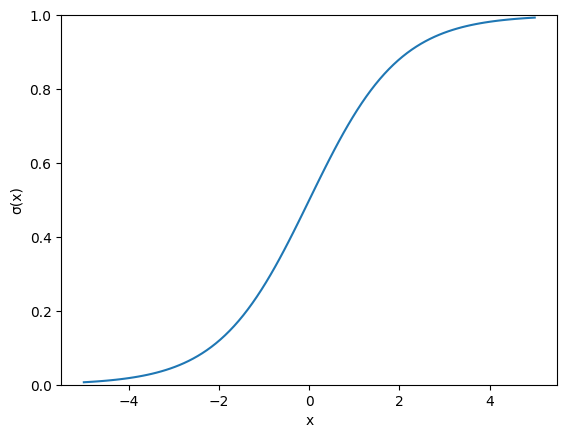

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(0, 1)
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.show()

### Завдання 2

1. [Створіть](https://numpy.org/doc/stable/reference/generated/numpy.array.html) вектор $v=\overline{(0,1)}$;
2. Створіть матрицю 
$M=\begin{bmatrix}
\cos \alpha & -\sin \alpha \\
\sin \alpha & \cos \alpha 
\end{bmatrix}$ , де $\alpha \in R$;
3. Обчисліть $v_i, i \in \{1..100\}$, де
$v_1=v,
v_{n+1}=v_n\times M \cdot 0.99$;

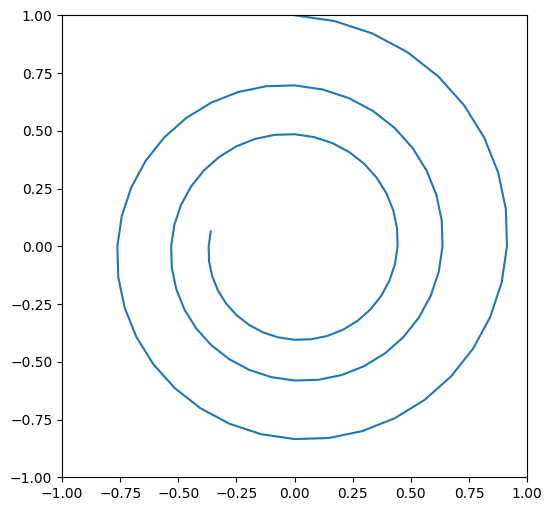

In [4]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([0, 1])

alpha = np.radians(10)
M = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])

vs = [v]
for i in range(100):
    v = np.dot(v, M) * 0.99
    vs.append(v)
    
vs = np.array(vs)

plt.figure(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot(*vs.T)
plt.show()

### Завдання 3

Одним з алгоритмів навчання з учителем є так звана поліноміальна регресія. Для цього методу, потрібно маючи матрицю
$$X=\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots \\
x_{m}
\end{bmatrix}$$
отримати матрицю ступенів:
$$X_p=\begin{bmatrix}
x^{0}_{1} & x^{1}_{1} & \dotsc & x^{p}_{1}\\\
x^{0}_{2} & x^{1}_{2} & \dotsc & x^{p}_{2}\\\
\vdots & \vdots & & \vdots \\
x^{0}_{m} & x^{1}_{m} & \dotsc & x^{p}_{m}
\end{bmatrix}$$

Маючи матрицю $X$, задану нижче, обчисліть матрицю $X_p$, для $p=5$.
Розв'язати задачу як з використанням циклу за степенями, так і без нього.

Корисні функції: [stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html), [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).

Shape of X: (1000, 1)
Shape of loop X_p (1000, 6)


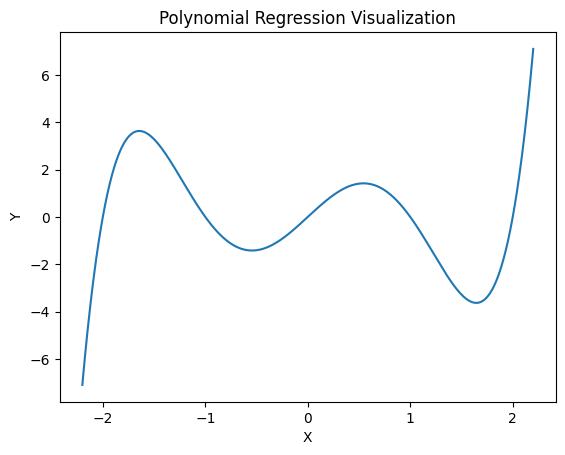

Shape of no loop X_p (1000, 6)


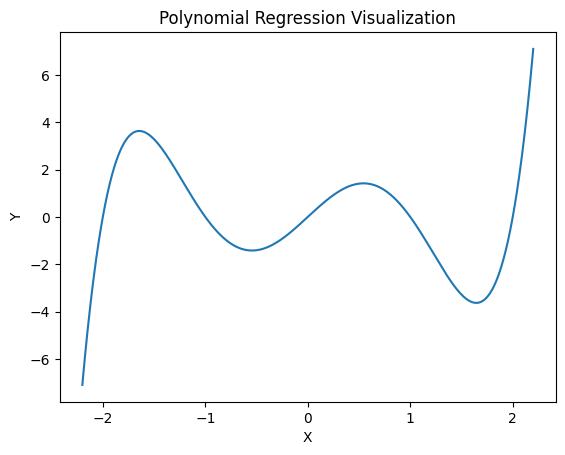

In [7]:
X = np.linspace(-2.2, 2.2, 1000)[:, np.newaxis]
print(f'Shape of X: {X.shape}')

p = 5
m = X.shape[0]



degree_matrices = []
for i in range(p + 1):
    degree_matrices.append(X ** i)
X_p_loop = np.stack(degree_matrices, axis=1).reshape(m, p + 1)

print(f'Shape of loop X_p {X_p_loop.shape}')
assert X_p_loop.shape == (1000, 6)

plt.plot(
    X[..., 0],
    X_p_loop @ np.array([[0, 4, 0, -5, 0, 1]]).T
)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Visualization')
plt.show()



X_p = np.concatenate([X ** i for i in range(p + 1)], axis=1)

print(f'Shape of no loop X_p {X_p.shape}')
assert X_p.shape == (1000, 6)

plt.plot(
    X[..., 0],
    X_p @ np.array([[0, 4, 0, -5, 0, 1]]).T
)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Visualization')
plt.show()

### Завдання 4 (*)

Намалюйте графік функції Растригіна:
$$f( x,y) =20+\left( x^{2} -10\cos( 2\pi x)\right) +\left( y^{2} -10\cos( 2\pi y)\right) ,\ x\in [ -5,\ 5] ,\ y\in [ -5,\ 5]$$

Використовувати цикли **заборонено**.

Корисні функції: 
[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html),
[meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html),
[reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

(Для красивої візуалізації візьміть по 500 кроків для $x$ і $y$).

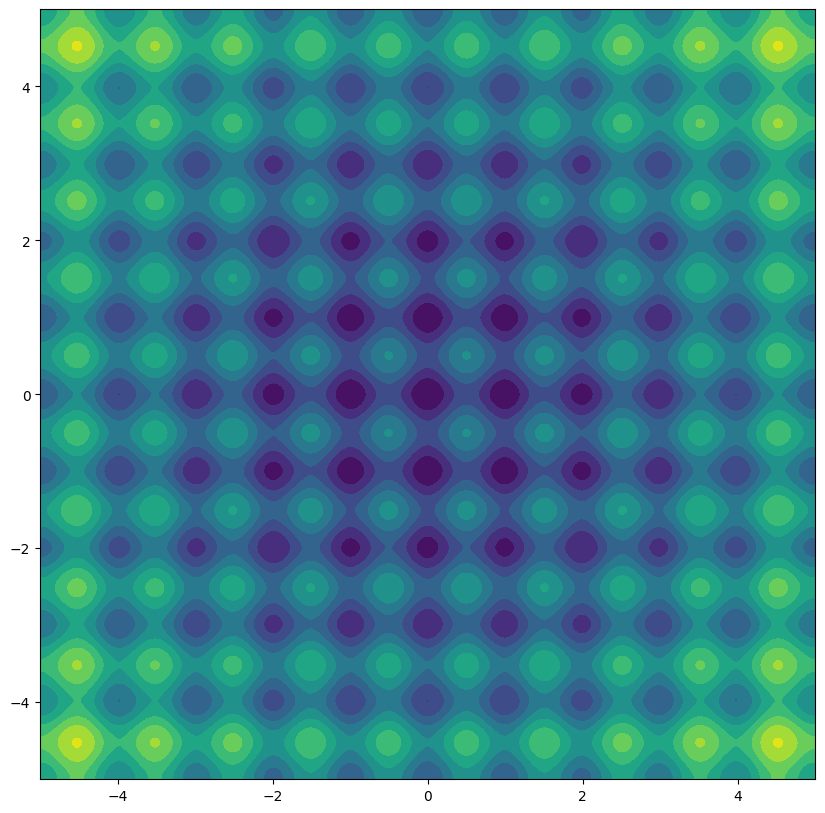

In [9]:
def rastrigin(x, y):
    return 20 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))

x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)

X, Y = np.meshgrid(x, y)

Z = rastrigin(X, Y)

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=10)
plt.show()